In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Load data (pick up from where we left off in preprocess_data.ipynb)

In [2]:
# Load pickles
data = pd.read_pickle("data.pkl")
PCA_ds = pd.read_pickle("PCA_ds.pkl")
scaled_ds = pd.read_pickle("scaled_ds.pkl")

# Set the same nice colors
sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Set colors based on Nintendo's colors for fun
color_dict = {
'Nintendo Red': '#FF4C4C',
'Nintendo Blue': '#0078F8',
'Nintendo Green': '#7CFC00',
'Nintendo Yellow': '#FFD700',
}
nintendo_colors = list(color_dict.values())
cmap = colors.ListedColormap(nintendo_colors)

In [3]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.609855,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,0.013562,0.009042,0.150542,512.144213,55.086347,607.268083,0.645570,0.947559,2.593128,0.714286
std,0.682635,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,0.115691,0.094678,0.357683,232.551465,11.701599,602.513364,0.478449,0.749466,0.906236,0.451856
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,340.000000,47.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,513.000000,54.000000,397.000000,1.000000,1.000000,3.000000,1.000000
75%,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,686.000000,65.000000,1048.000000,1.000000,1.000000,3.000000,1.000000
max,2.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1063.000000,84.000000,2525.000000,1.000000,3.000000,5.000000,1.000000


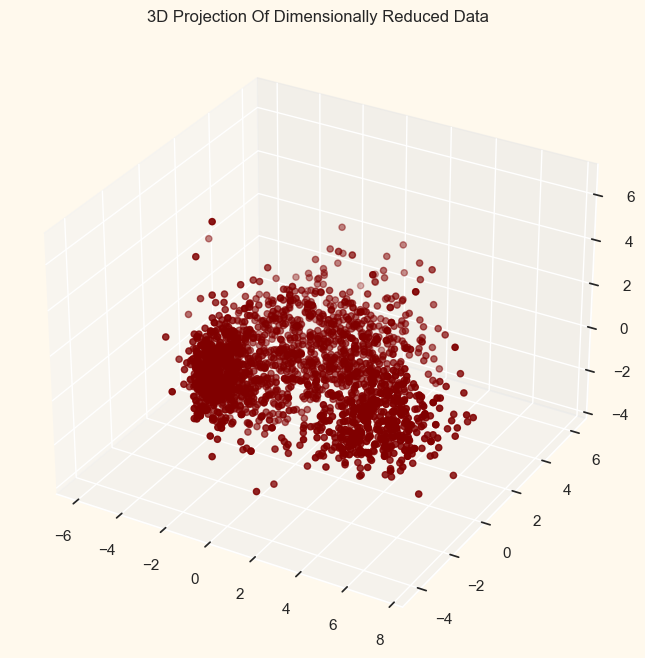

In [17]:
#A 3D Projection Of Data In The Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("3D Projection Of Dimensionally Reduced Data")
plt.show()

# Clustering
Now that the data have been reduced to three dimensions, we perform clustering. We will compare hand-built K-means clustering to Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps:
- Elbow Method to determine the number of clusters to be formed
- Clustering via Agglomerative Clustering
- Examining the clusters formed via scatter plot


Elbow Method to determine the number of clusters to be formed:


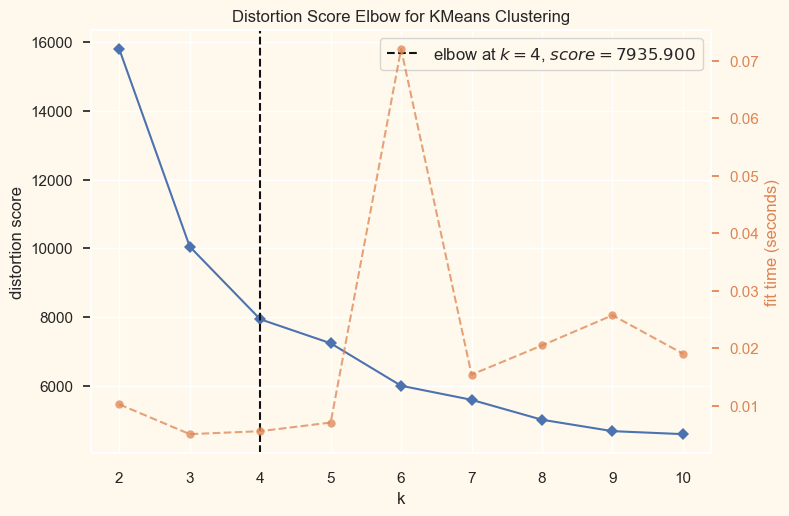

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [19]:
# Four is the optimal number of clusters

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

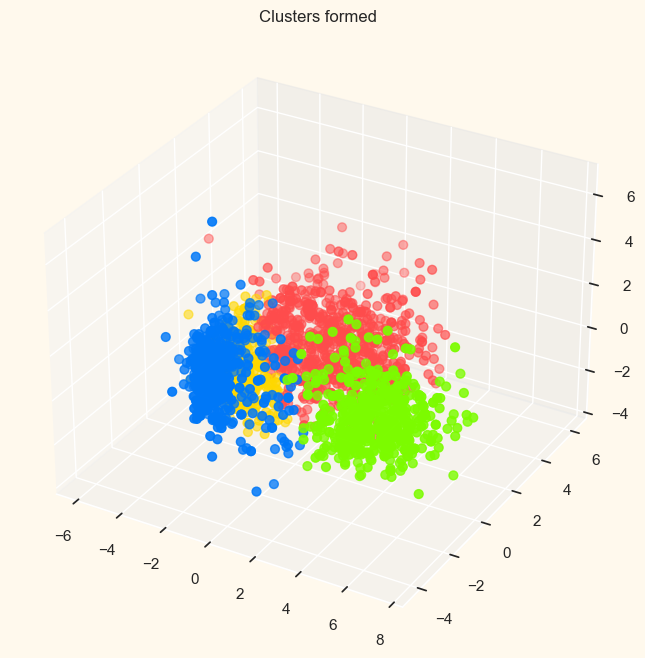

In [20]:
# Examine clusters formed
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("Clusters formed")
plt.show()

# Model evaluation
Since this is an unsupervised clustering, we do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will look at the data in light of clusters via exploratory data analysis and by drawing conclusions.

Firstly, we look at the group distribution of clustring


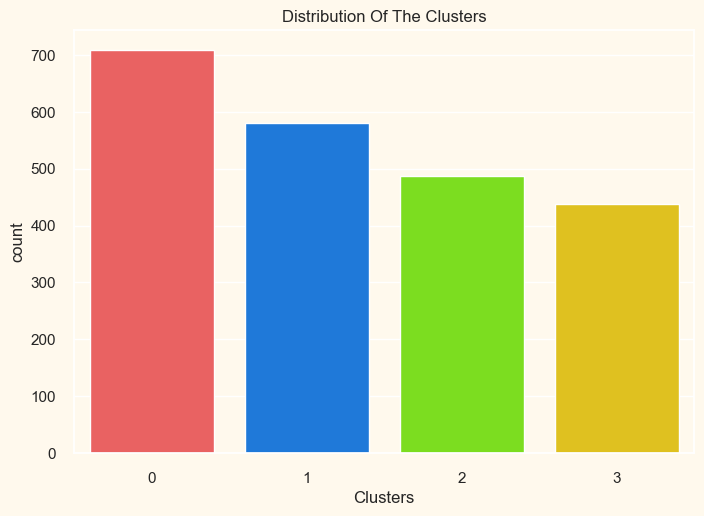

In [21]:
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters"], palette=nintendo_colors)
pl.set_title("Distribution Of The Clusters")
plt.show()


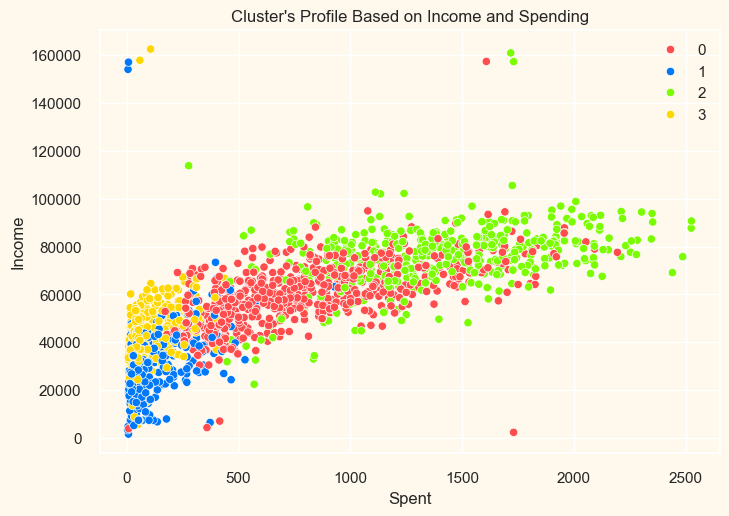

In [22]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette=nintendo_colors)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()
plt.show()

### Income vs spending plot shows the clusters pattern

- Group 0: high spending & average income
- Group 1: high spending & high income
- Group 2: low spending & low income
- Group 3: high spending & low income


Next, let's look at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

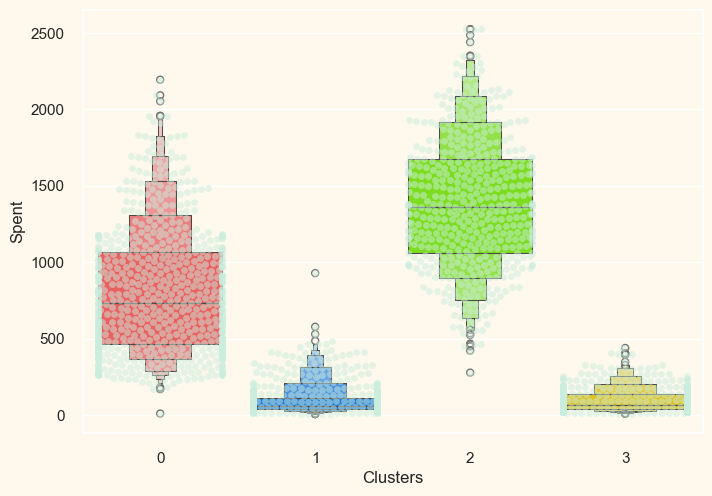

In [23]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=nintendo_colors)
plt.show()

Observation: 
- Clusters 2 and 0 are the largest set of customers.
- We can explore what each group is spending on for the targeted marketing strategies

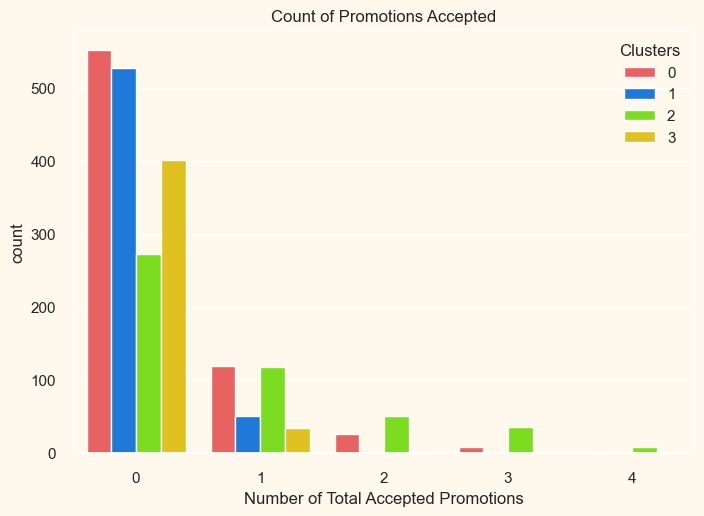

In [24]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= nintendo_colors)
pl.set_title("Count of Promotions Accepted")
pl.set_xlabel("Number of Total Accepted Promotions")
plt.show()

#### Observation: 

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

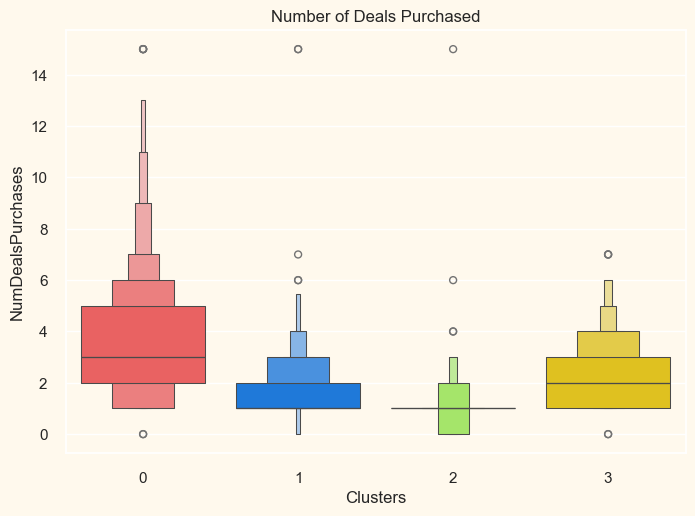

In [25]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= nintendo_colors)
pl.set_title("Number of Deals Purchased")
plt.show()

#### Observation
Unlike campaigns, the deals offered did well. It had the best outcome with clusters 0 and 3. However, our star customers in cluster 2 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly.

# Profiling

Now that we have formed the clusters and looked at their purchasing habits, let's see who's in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that, let's plot some of the features that are indicative of the customer's personal traits in light of the cluster they are in.

 Then, we can form some conclusions.


<Figure size 800x550 with 0 Axes>

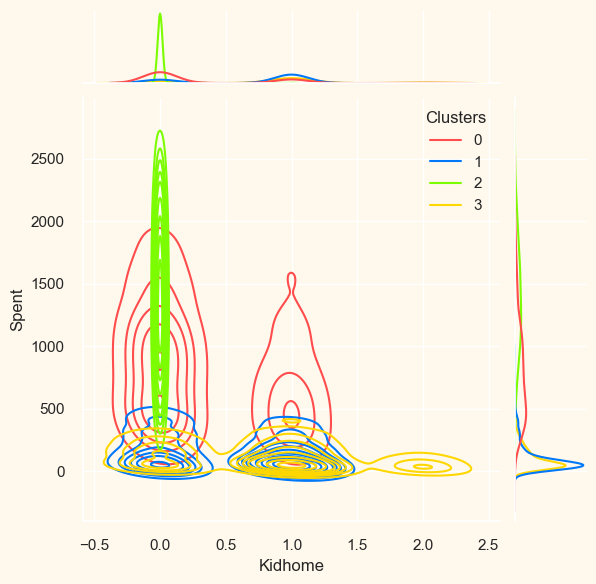

<Figure size 800x550 with 0 Axes>

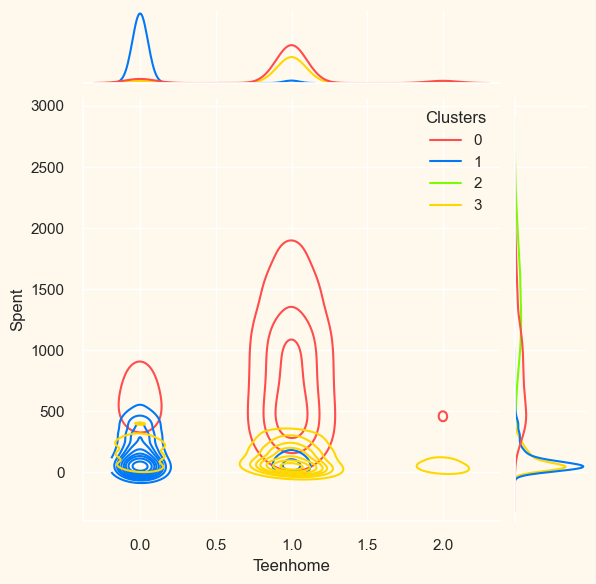

<Figure size 800x550 with 0 Axes>

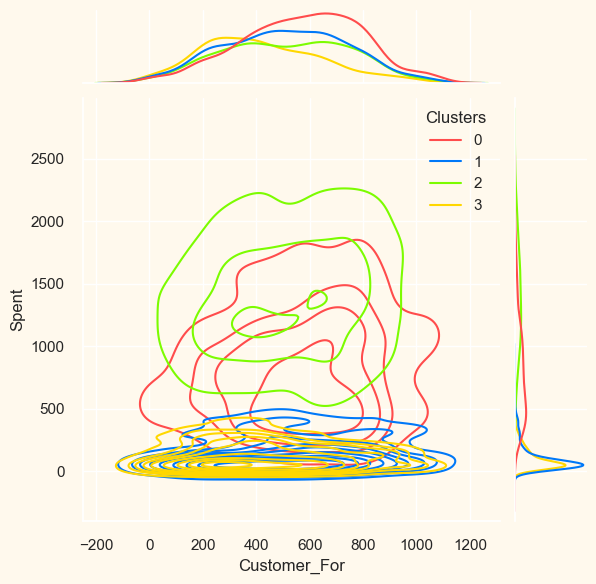

<Figure size 800x550 with 0 Axes>

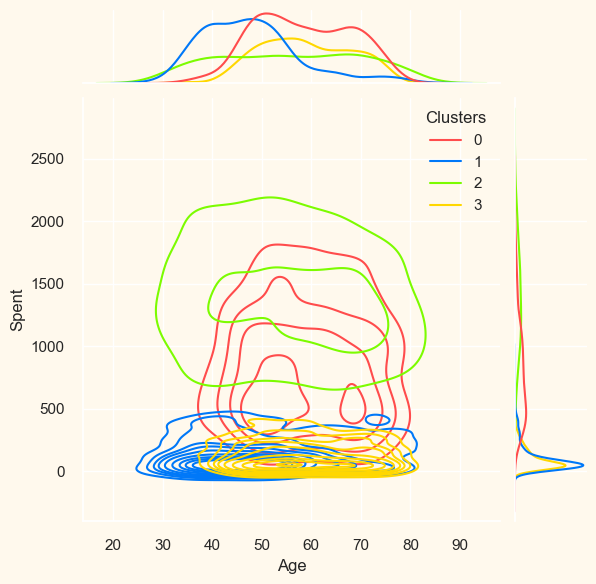

<Figure size 800x550 with 0 Axes>

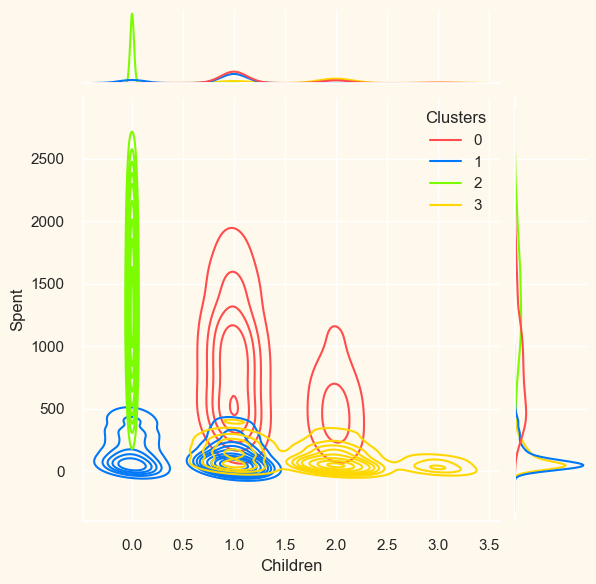

<Figure size 800x550 with 0 Axes>

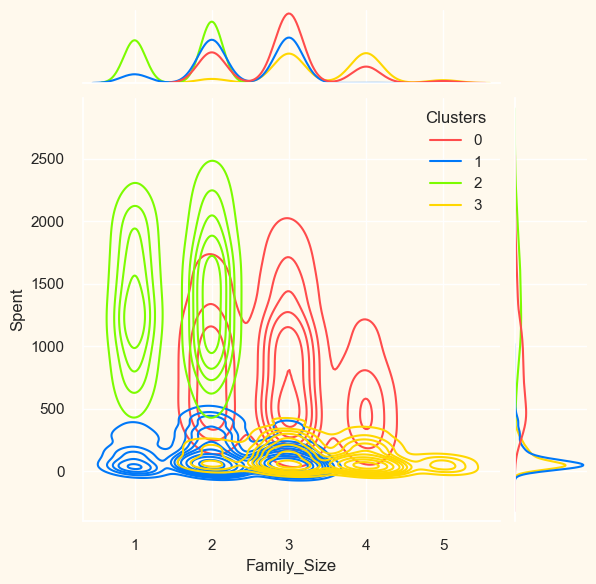

<Figure size 800x550 with 0 Axes>

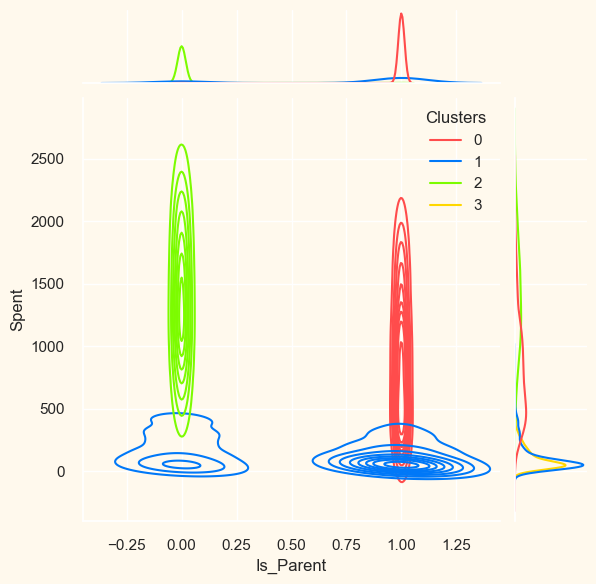

<Figure size 800x550 with 0 Axes>

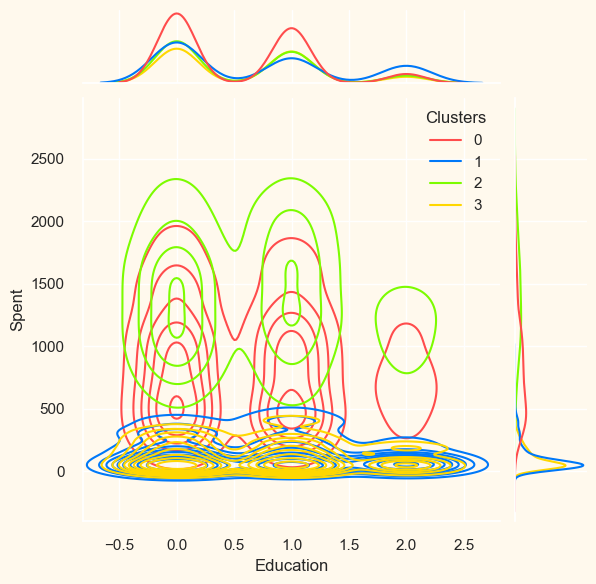

<Figure size 800x550 with 0 Axes>

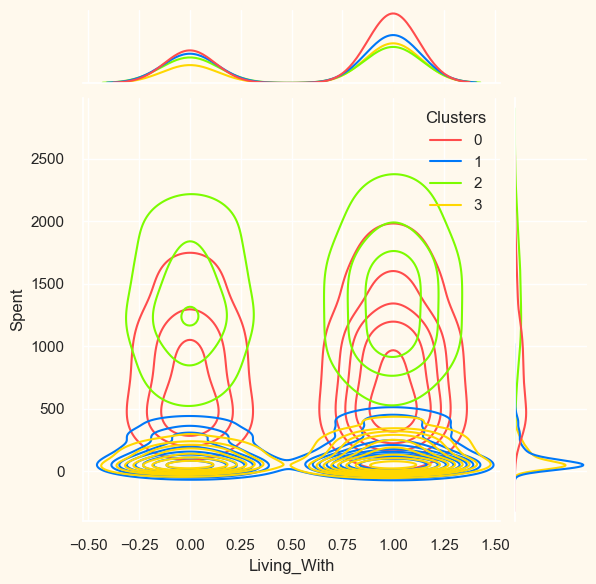

In [26]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=nintendo_colors)
    plt.show()

# Conclusion:

## Cluster 0 Profile:
- Definitely parents
- At least 2 family members, at the max 4
- Single parents are a subset of this group
- Most have a teenager at home
- Relatively older

## Cluster 1 Profile:
- Definitely not parents
- At max only two members
- Slight majority of couples over single people
- Span all ages
- High income

## Cluster 2 Profile:
- Majority are parents
- At max 3 members of family
- Typically have kids over teenagers
- Relatively younger

## Cluster 3 Profile:
- Definitely not parents
- At least 2 members of family, at max 5
- Majority have a teenager at home
- Relatively older
- Lower-income group

## This clustering reveals information about family structures and income/spending. Grocery store marketing can benefit from such insights to improve deals and offer target groups.